## Hospital likelihood plot

You are trying to estimate the mortality rate $p$ of those in a hospital. Each patient's mortality is modelled by a Bernoulli distribution $X_i \sim B(\theta)$.

We observe 47 deaths and 53 survivals in a sample of 100 patients. Find the MLE (the $\theta$ that maximizes the likelihood of observing the data)

In [31]:
library(tidyverse)
# 1 = died, 0 = survived
obs <- c(rep(0,53), rep(1,47))
died <- sum(obs)
survived <- sum(!obs)
p.hat <- died/length(obs)

bernoulli.loglikelihood <- function(theta) sum(obs)*log(theta) + sum(1-obs)*log((1-theta))

-- Attaching packages --------------------------------------- tidyverse 1.3.0 --

v ggplot2 3.3.2     v purrr   0.3.4
v tibble  3.0.4     v dplyr   1.0.6
v tidyr   1.1.2     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.0

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



In [18]:
sum(obs)*log(p.hat) + sum(1-obs)*(log(1-p.hat))

[1] -35.83541

theta,loglikelihood
<dbl>,<dbl>
0.47001,-69.13461


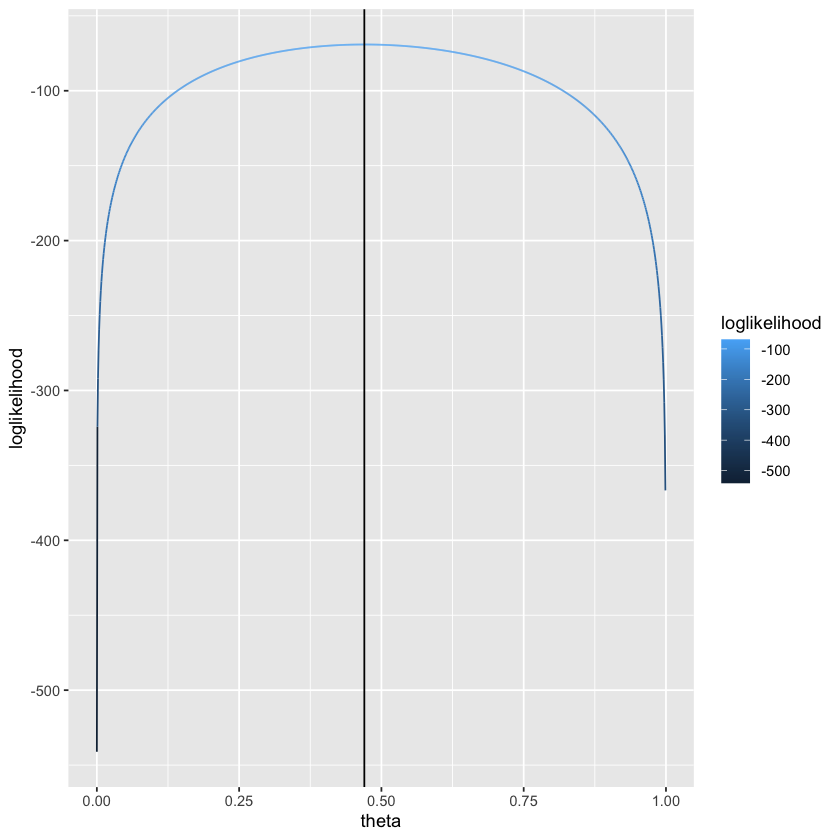

In [41]:
thetas <- seq(0.00001,0.99999,0.001)
loglikelihoods <- bernoulli.loglikelihood(thetas)
res <- tibble(
    theta = thetas,
    loglikelihood = loglikelihoods)
res %>% filter(loglikelihood==max(loglikelihood))
res %>% ggplot(aes(x=theta,y=loglikelihood,color=loglikelihood)) + geom_line() + geom_vline(aes(xintercept = p.hat))